In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import acquire
import prepare

Exercises
Part 1
Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.
Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:
Acquire, prepare & split your data.



In [ ]:
#import data
iris = acquire.get_iris_data()
#take peek at data
iris.head()

In [3]:
train, validate, test = prepare.prep_iris(iris)

In [4]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0


In [5]:
# shape
train.shape, validate.shape, test.shape

((84, 8), (36, 8), (30, 8))

In [6]:
# Stratification means we'll get even proportions of the target variable in each data set
train.species, validate.species, test.species

(79     versicolor
 36         setosa
 133     virginica
 95     versicolor
 18         setosa
 139     virginica
 20         setosa
 31         setosa
 6          setosa
 115     virginica
 91     versicolor
 145     virginica
 125     virginica
 82     versicolor
 126     virginica
 142     virginica
 15         setosa
 52     versicolor
 4          setosa
 131     virginica
 97     versicolor
 70     versicolor
 51     versicolor
 57     versicolor
 41         setosa
 53     versicolor
 69     versicolor
 23         setosa
 87     versicolor
 3          setosa
 67     versicolor
 35         setosa
 128     virginica
 1          setosa
 16         setosa
 92     versicolor
 32         setosa
 129     virginica
 48         setosa
 25         setosa
 12         setosa
 96     versicolor
 46         setosa
 103     virginica
 89     versicolor
 123     virginica
 120     virginica
 147     virginica
 114     virginica
 83     versicolor
 26         setosa
 84     versicolor
 8          

In [7]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [8]:
# Creating a list of our numeric columns
numcols = [col for col in train.columns if train[col].dtype != 'O']

sepal_length


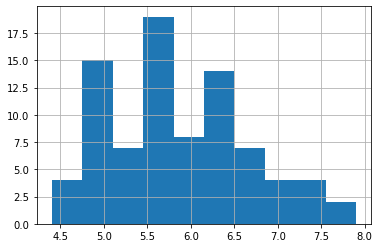

sepal_width


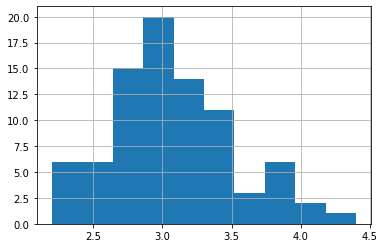

petal_length


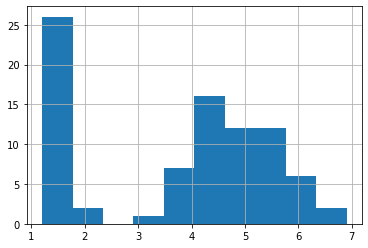

petal_width


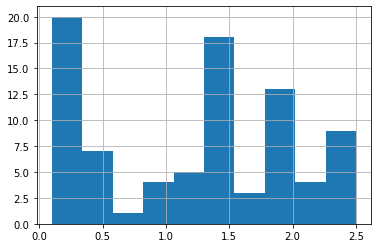

setosa


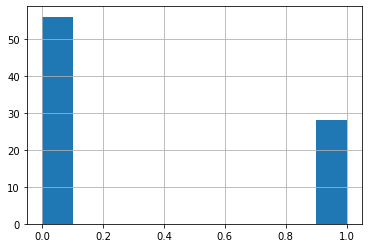

versicolor


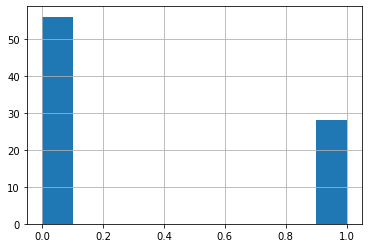

virginica


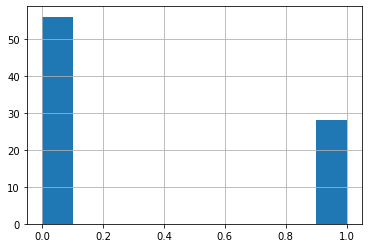

In [11]:
# Histograms of numeric columns
for col in numcols:
    print(col)
    train[col].hist()
    plt.show()

Takeaway: 
Numeric column have varying distributions

In [17]:
cat_vars = ['species']

species
versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64
versicolor    33.333333
setosa        33.333333
virginica     33.333333
Name: species, dtype: float64


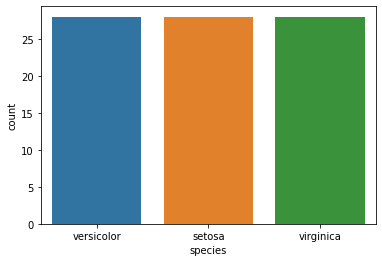

In [18]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

In [ ]:
Takeaway: Categorical column(species is even distributed) due to training split with 28 of each species.

Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.



Takeaways-not much 

Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.



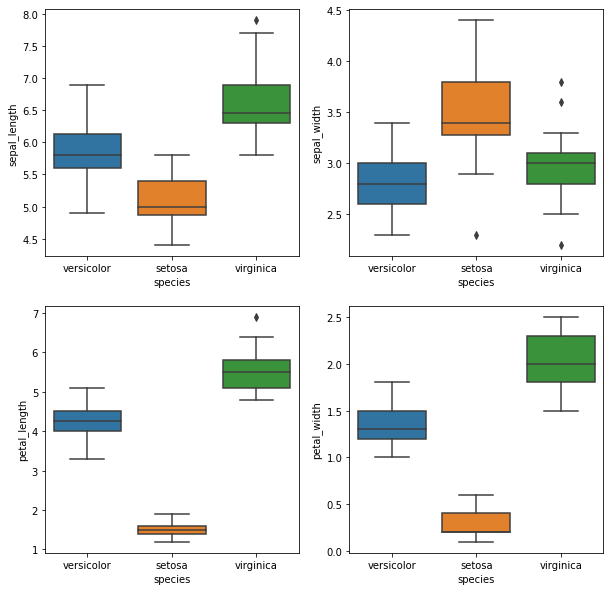

In [23]:
def graph(y):
    sns.boxplot(x='species', y=y, data=train)
  
plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepal_length')
  
plt.subplot(222)
graph('sepal_width')
  
plt.subplot(223)
graph('petal_length')
  
plt.subplot(224)
graph('petal_width')
  
plt.show()

Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.



Part II
Explore your titanic dataset more completely.

Determine drivers of the target variable
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.



Part III
Explore your telco data to discover drivers of churn
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.